<a href="https://colab.research.google.com/github/sarahtaam/CodeAlpha_ML_Intership/blob/main/Credit%20Scoring%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [92]:
dataset=pd.read_csv("/content/bank.csv",sep=";").drop_duplicates()

In [93]:
# shows count of rows and columns
dataset.shape

(4521, 17)

In [94]:
# Display the first few rows of the dataset
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [95]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [96]:
dataset.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [98]:
# Check for missing values
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [99]:
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<Axes: xlabel='marital', ylabel='count'>

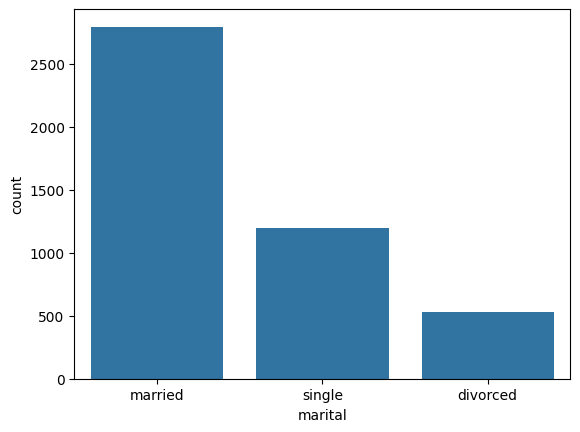

In [100]:
sns.countplot(x='marital',data=dataset)

<Axes: xlabel='poutcome', ylabel='count'>

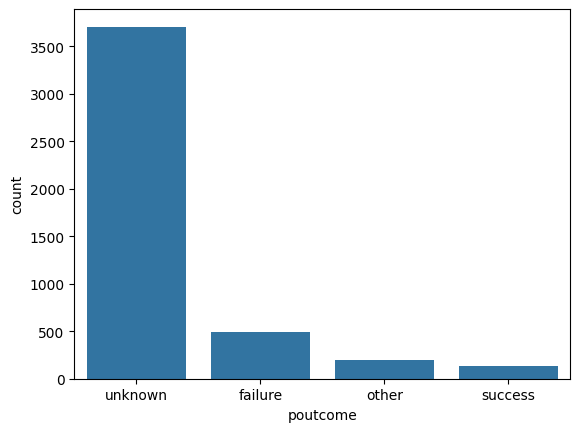

In [101]:
sns.countplot(x='poutcome',data=dataset)

<Axes: xlabel='housing', ylabel='count'>

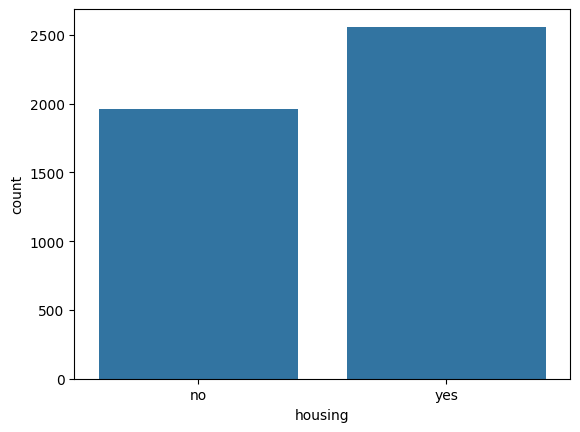

In [102]:
sns.countplot(x='housing',data=dataset)

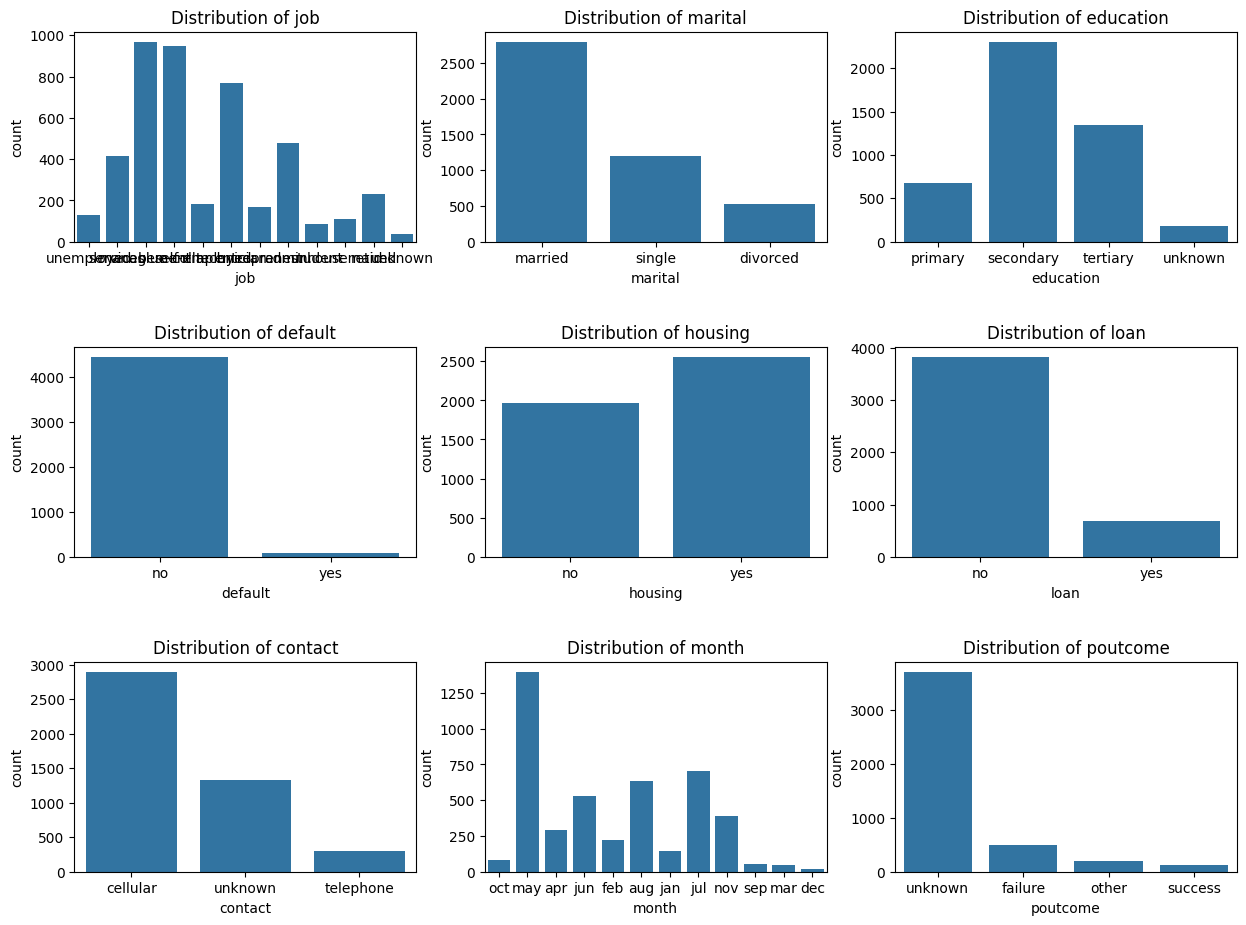

In [103]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
# Loop through categorical features and create countplots
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplots
for i in range(len(categorical_features), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.show()
# Plot histograms for each categorical feature
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')


plt.show()

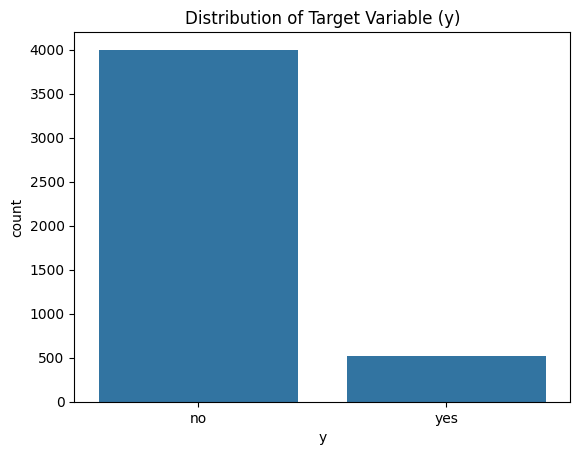

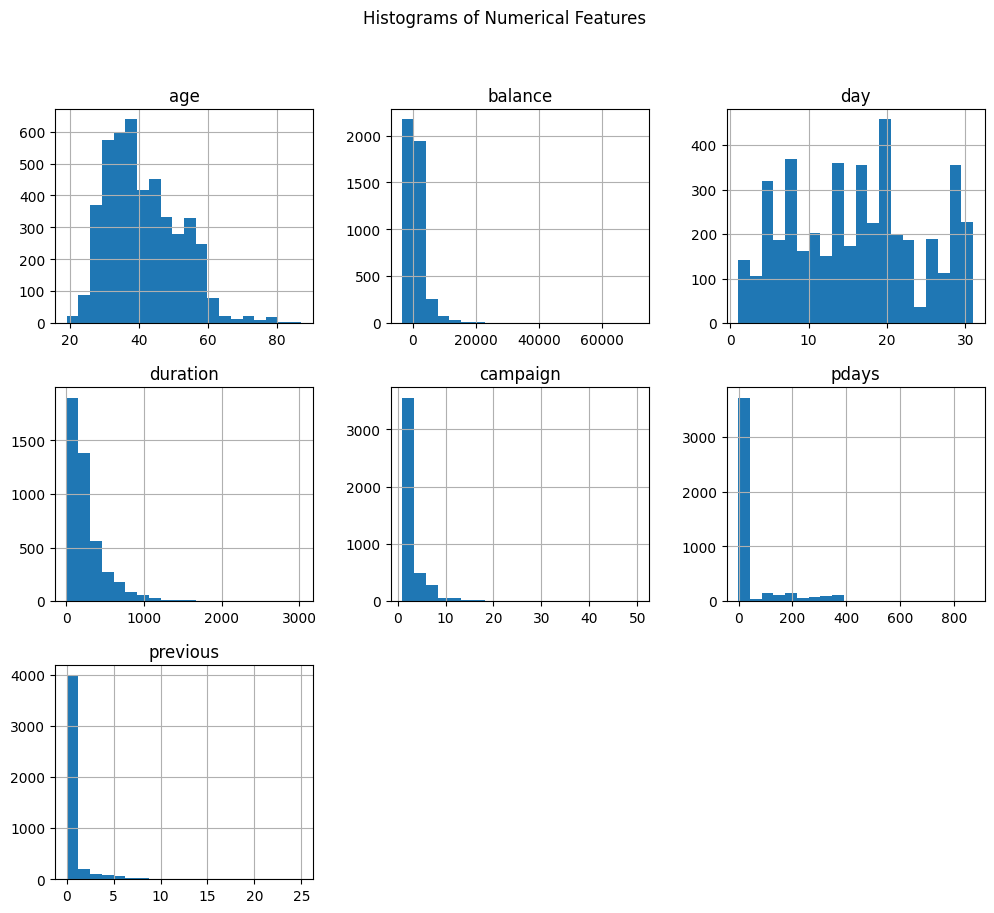

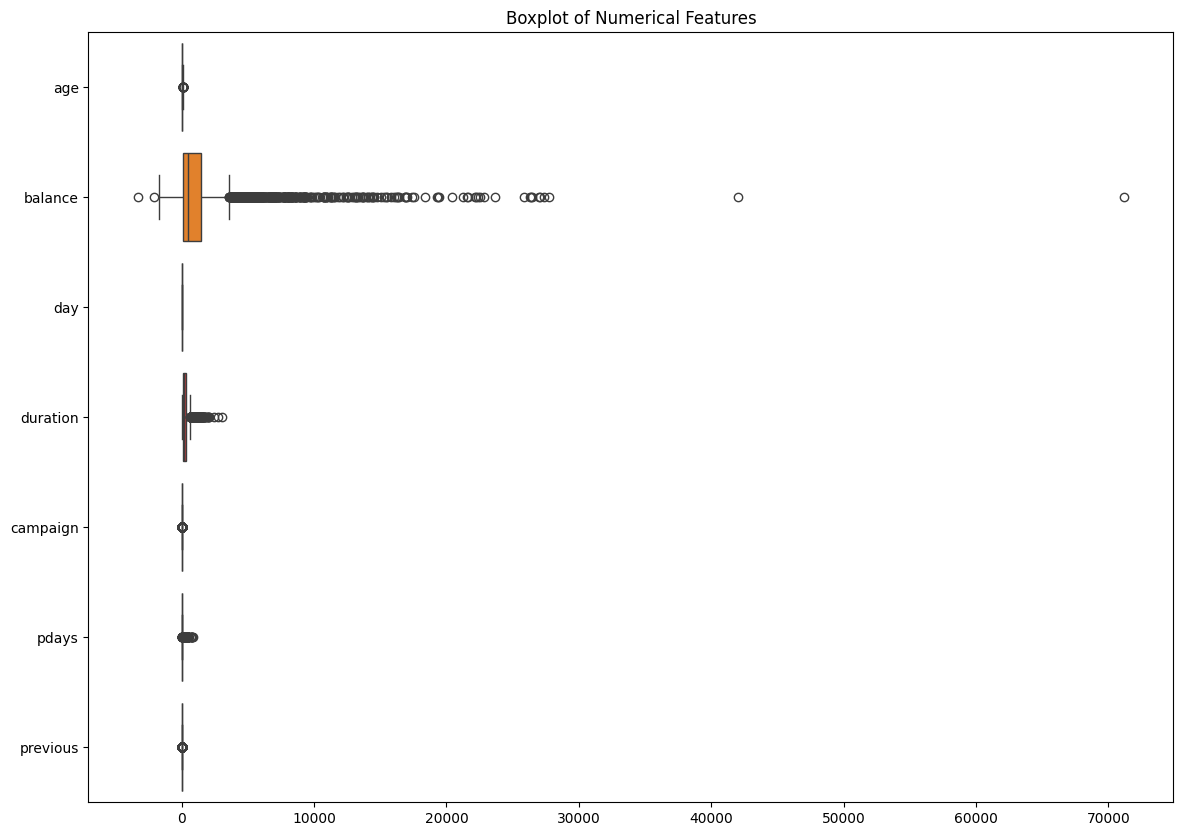

In [104]:
# Distribution of the target variable 'y'
sns.countplot(x='y', data=dataset)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Distribution of numerical features
dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot of numerical features
plt.figure(figsize=(14, 10))
sns.boxplot(data=dataset, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

In [105]:
lst=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in lst:
    dataset[i]=le.fit_transform(dataset[i])

In [106]:
dataset.rename(columns={"y": "loan_approval"}, inplace=True)

In [107]:
x=dataset.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1


In [108]:
y=dataset.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: loan_approval, Length: 4521, dtype: int64

In [109]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [110]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.41176471, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.36764706, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.90909091, 0.5       , ..., 0.24082569, 0.12      ,
        0.66666667]])

In [111]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

MODEL IMPLIMENTATION

In [112]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       390
           1       0.81      1.00      0.90       410

    accuracy                           0.88       800
   macro avg       0.91      0.88      0.88       800
weighted avg       0.90      0.88      0.88       800



In [113]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [114]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       390
           1       0.87      0.93      0.90       410

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [115]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)

In [116]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       390
           1       0.75      0.74      0.74       410

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [117]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)

In [118]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       390
           1       0.86      0.96      0.91       410

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



In [119]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

In [120]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       390
           1       0.96      1.00      0.98       410

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [121]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       390
           1       0.95      1.00      0.97       410

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



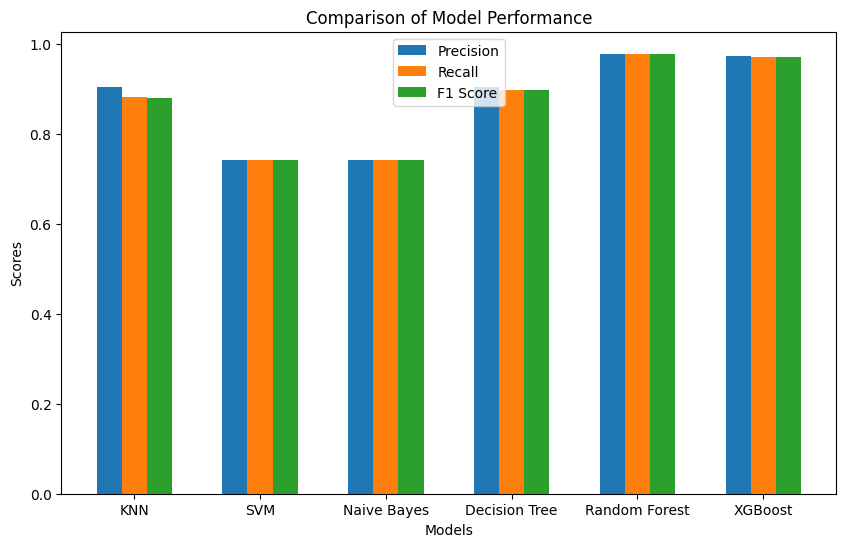

In [123]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their respective predictions
models = ['KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
predictions = [y_pred1, y_pred2, y_pred2, y_pred3, y_pred4, y_pred7]

# Calculate precision, recall, and f1-score for each model
precision = []
recall = []
f1_score = []
for y_pred in predictions:
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision.append(p)
    recall.append(r)
    f1_score.append(f)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

rect1 = ax.bar(index, precision, bar_width, label='Precision')
rect2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
rect3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.show()


In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
225/225 [==============================] - 3s 6ms/step - loss: 0.6507 - accuracy: 0.6453 - val_loss: 0.6116 - val_accuracy: 0.6662
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5689 - accuracy: 0.7068 - val_loss: 0.5417 - val_accuracy: 0.7400
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5083 - accuracy: 0.7626 - val_loss: 0.4993 - val_accuracy: 0.7700
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7837 - val_loss: 0.4869 - val_accuracy: 0.7875
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.7911 - val_loss: 0.4871 - val_accuracy: 0.7962
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4688 - accuracy: 0.7947 - val_loss: 0.4818 - val_accuracy: 0.7925
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4670 - accuracy: 0.7936 - val_loss: 0.4804 - val_accuracy: 0.7937
Epoch 